## **Libraries**

In [3]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ee/d3/67ccdab9d2756f8b30b0669015840cd5fdb5f062a2d621d67f033cf3dd54/wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 586.1 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/amina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
df = pd.read_csv('kaggle_movie_train.csv')
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


# **Exploring the dataset**

In [7]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [8]:
df.shape

(22579, 3)

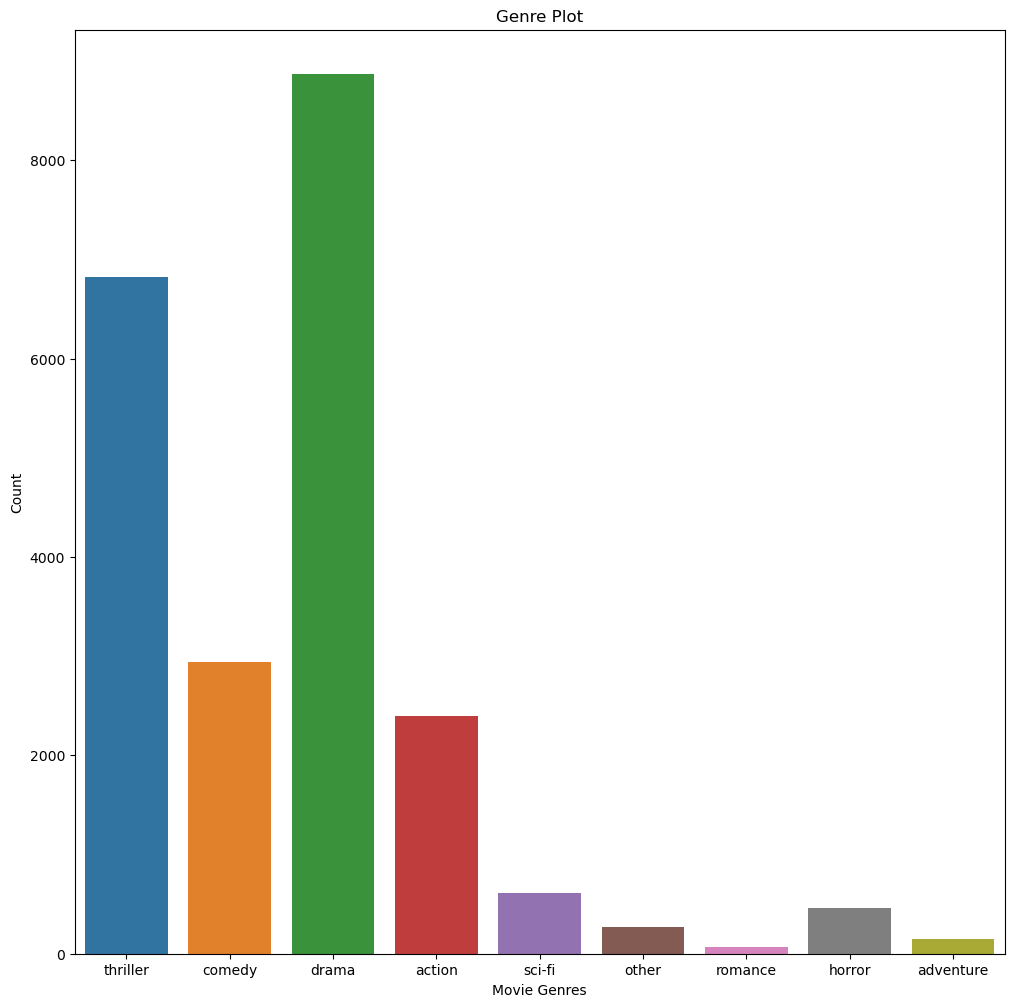

In [10]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# **Data Cleaning and Preprocessing**

In [11]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [12]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [13]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [14]:
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [15]:
df.shape

(22579, 2)

In [16]:
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])
  dialog = dialog.lower()
  words = dialog.split()
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in dialog_words]
  dialog = ' '.join(words)
  corpus.append(dialog)

In [17]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [18]:
df[df['genre']==4].index

Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,    16,
       ...
       22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574, 22575],
      dtype='int64', length=8873)

In [19]:
len(corpus)

22579

In [20]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

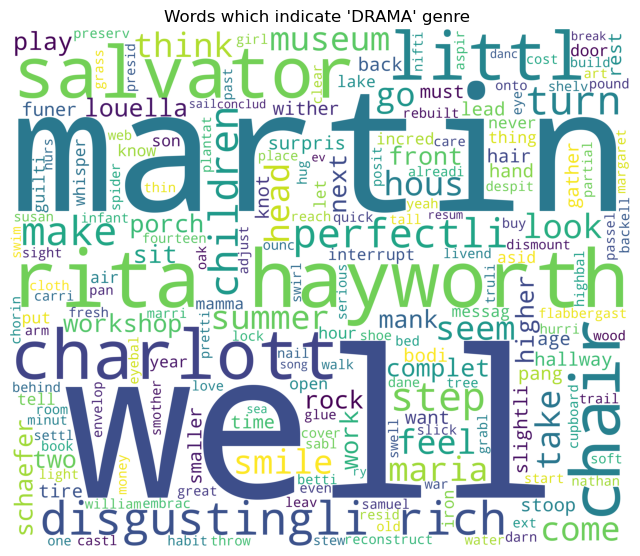

In [21]:
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

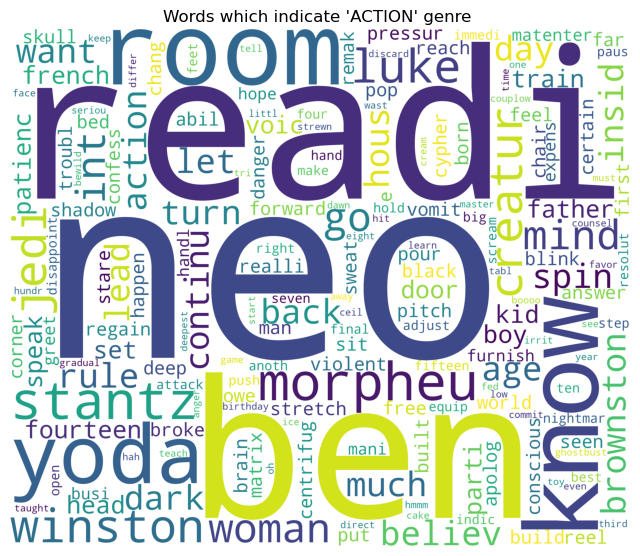

In [22]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

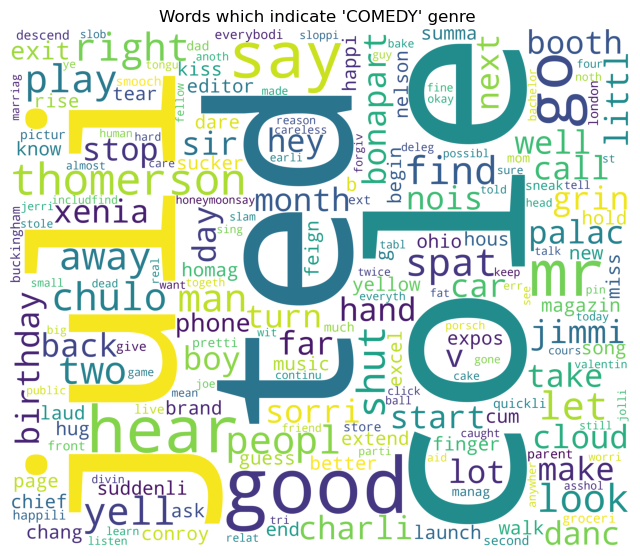

In [23]:
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [24]:
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [25]:
y = df['genre'].values

# **Model Building**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## *Multinomial Naive Bayes*

In [27]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [28]:
nb_y_pred = nb_classifier.predict(X_test)

In [30]:
score1 = accuracy_score(y_test, nb_y_pred)
format(round(score1*100,2))

'89.55'

In [31]:
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [32]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  518,   18,    2,    0,    4,   10],
       [   3,   43,    1,   38, 1606,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   78,   11,    0,   22, 1172]])

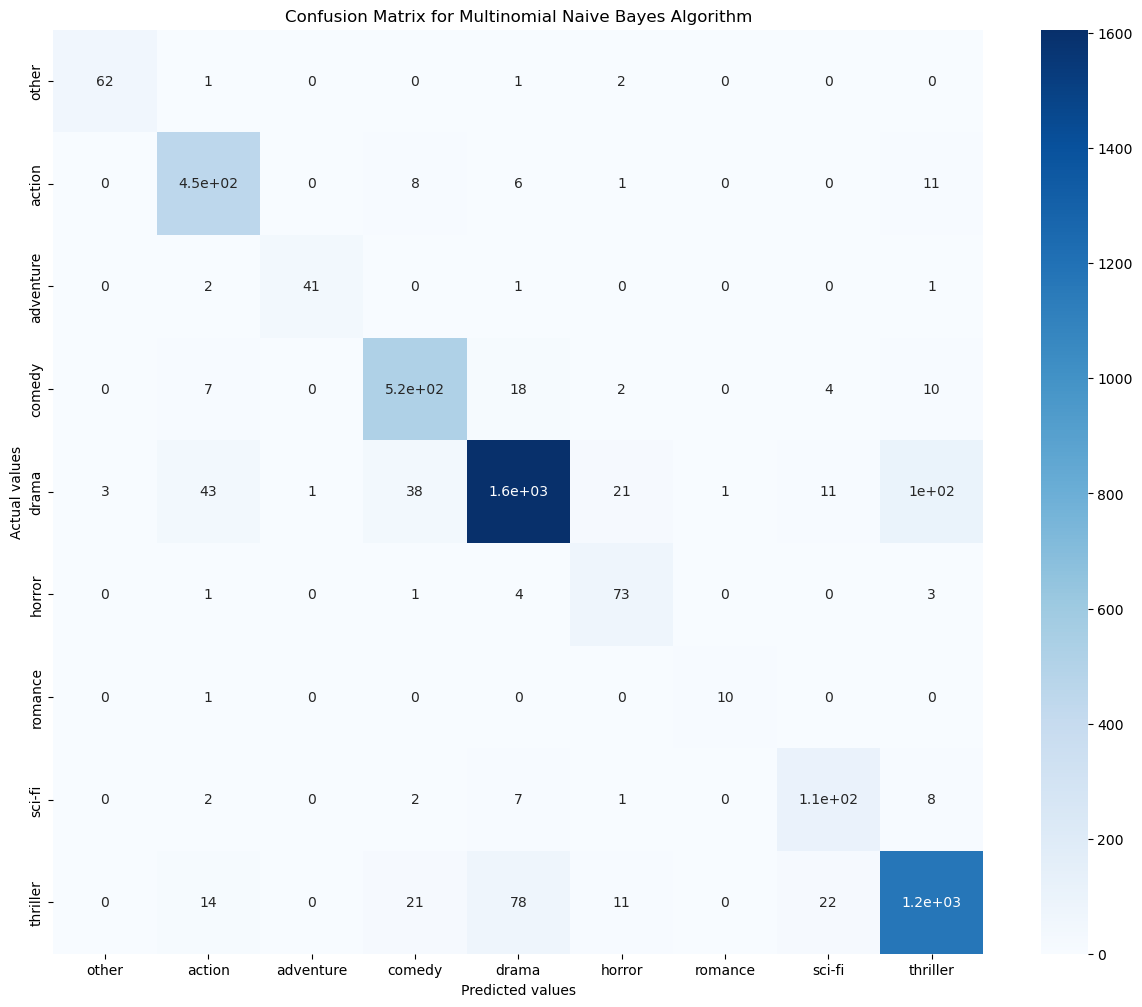

In [33]:
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [34]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.43%
Accuracy score for alpha=0.2 is: 91.1%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.61%
Accuracy score for alpha=0.5 is: 90.23%
Accuracy score for alpha=0.6 is: 90.1%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.9%
Accuracy score for alpha=0.9 is: 89.75%
Accuracy score for alpha=1.0 is: 89.55%
--------------------------------------------
The best accuracy is 91.43% with alpha value as 0.1


In [35]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# **Predictions**

In [36]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)
  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [37]:
test = pd.read_csv('kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [38]:
test.head()

,id,text
0,1,glances at her. BOOK Maybe I ought to learn t...
1,8,hout breaking stride. Tatiana sees her and can...
2,13,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,24,take myself. BRANDON How bad is the other thi...
4,38,"her body to shield his own. KAY Freeze it, Bug..."


In [39]:
test.shape

(5589, 2)

In [40]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [41]:
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: nues to walk from the set. CREW Okay cut! That's a rap! EXTERIOR GEORGETOWN UNIVERSITY ENTRANCE DAY We see Chris descending a flight of stairs walking toward a car. CHRIS I think I'll walk home tonight Mike. MIKE All right. She hands her leather case to him. CHRIS And take that and drop it by my house. She walks off and waves goodnight to the crew across the road. As she turns the corner and walks down the road, Mike Oldfield's Tubular Bells begins to play. She walks through the leaf covered street on Halloween and sees a group of kids in costume run past her. She carries on walking and sees to nuns waking in the wind, with the gowns blowing. She approaches the local chapel and over hears a voice. KARRAS There's not a day in my life when I don't feel like a fraud. I mean priests, doctor, lawyers I've talked to them all, I don't know anyone who hasn't felt that. She sees that's it's the young Jesuit who was at the campus earlier, and that he is talking to another priest. We don'

In [42]:
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ting now and continuing throughout is this the sound of typing. CUT TO PAUL'S ROOM PAUL, working at his typewriter. CUT TO THE MANUSCRIPT. Growing. CUT TO ANNIE'S BEDROOM. DUSK. ANNIE, in her room. Reading and loving it. CUT TO BUSTER'S DEN. NIGHT. BUSTER sitting in his den reading a Misery novel by the fire. VIRGINIA brings him a cup of tea. CUT TO PAUL'S ROOM. DAY. PAUL, the sling off, moving his injured arm. It's more mobile than before. Testing his strength, he uses his arm to remove the page and place it on the pile. He puts in another page and continues to type. CUT TO ANNIE, entering Paul's room, carrying a chapter. Handing him a cup of tea. ANNIE Paul, this is positively the best Misery you've ever written. PAUL I think you're right. CUT TO THE PILE OF PAPER. Bigger. CUT TO OUTSIDE THE BARN ANNIE, out by the barn. She stares in at the house. Framed in the window is PAUL, working. She smiles, enters the barn. CUT TO PAUL'S ROOM. NIGHT. He stretches but only briefly, then

In [43]:
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  intense sexual desire. CLOSE UP KATE ON FLOOR Looks up and watches, eyes wide with fear, Santanico's transformation. Her NOSE RECEDES INTO her face like a rodent's. The whites of her eyes turn YELLOW. The FANGS of a beast PROTRUDE from her mouth. Kate yells from the floor. KATE yelling Richie, look out! Before Richie can turn around. SANTANICO LEAPS ACROSS THE FLOOR, LANDS on his BACK and SINKS her FANGS into Richie's wounded SHOULDER. Richard LETS LOOSE with an agonizing SCREAM. Seth turns to his brother's cry. He sees SANTANICO PANDEMONIUM, like a mongoose attached to a cobra, legs wrapped around Richard's waist, fangs buried deep in his shoulder, and Richard screaming and slamming about, trying to knock her off. Richard screams to Seth RICHARD Shoot her! Shoot her! Get her off! Seth tries to aim his gun, but there's too much movement. He can't get a clear shot. Jacob and his children can't believe what they're seeing. Richard can't take it anymore, his knees buckle. Santani

In [44]:
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: cial rocks. Demons appear and drag the libertine down to Hell. The scene ends. CU, Salieri, staring wide eyed. CUT TO EXT. SCHIKANEDER'S THEATRE VIENNA NIGHT 1780'S We see huge and attractive posters and billboards advertising Schikaneder's troupe. The camera concentrates on the one which reads as follows EMMANUEL SCHIKANEDER Impresario de luxe PRESENTS The Celebrated SCHIKANEDER TROUPE OF PLAYERS IN An Evening of PARODY Music! Mirth! Magic! ALL SONGS AND SPEECHES WRITTEN BY EMMANUEL SCHIKANEDER who personally will appear in every scene! CUT TO INT. SCHIKANEDER'S THEATRE NIGHT 1780'S Noise smoke the audience is sitting at tables for an evening of vaudeville. Mozart, Constanze and their son Karl, now about two years old, and sitting on his mother's lap, are watching a parody scene by Schikaneder's troupe. They are rowdy, bawdy and silly, incorporating motifs, situations and tunes from Mozart's operas which we have seen and heard. Before them on the table are bottles of wine and 

In [45]:
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  DOE, and the people follow JOHN out into the street. DAN hastily seizes the phone. DAN Hey, Operator? Dan's Beanery. Look. Call everybody in town. John Doe was just in my place. Yeh. He ordered doughnuts. LONG SHOT Shooting out of window toward street. We see JOHN and the COLONEL as they hurry away, being followed by the crowd which is gradually growing larger . . . as we see people crossing the street to get to them TOWNSPEOPLE There he is! John Doe! There he is! Come on! Gotta see John Doe! DISSOLVE TO EXT. SIDEWALK MED. SHOT Millville City Hall. The sidewalk is crowded with people. Those near the entrance are trying to force their way in. MAYOR HAWKINS guards the door. MAYOR HAWKINS I know, you all voted for me and you're all anxious to see John Doe. We're all neighbors, but my office is packed like a sardine box. GIRL What does John Doe look like, Mr. Mayor. MAYOR HAWKINS Oh, he's one of those great big outdoor type of men. No, you can't see him. MAYOR notices one member o